## Project Overview
This project uses exploratory data analysis to generate insights for Microsoft  who have the business problem below.

Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio,

but they don’t know anything about creating movies. 

## Data used.
Box Office Mojo: bom.movie_gross.csv.gz

IMDB: im.db (tables: movie_basics, movie_ratings)


In [1]:
#Importing relevant libraries 
import pandas as pd
import numpy as np
import csv
import sqlite3

In [2]:
# Load the Box Office movies data on csv
bom_data = pd.read_csv('data/bom.movie_gross.csv.gz')
# viewing the fisrt few entries of the csv file
print(bom_data.head())

                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  


In [3]:
##connecting to IMDB movies SQlite Database
conn = sqlite3.connect('data/imd.db')

In [28]:
# Listing tables
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables in the database:")
print(tables)

Tables in the database:
            name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


In [29]:
# Viewing movie basics tables
movie_basics = pd.read_sql_query('SELECT * FROM movie_basics', conn)
movie_ratings = pd.read_sql_query('SELECT * FROM movie_ratings', conn)

print(movie_basics.head())

    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy  


In [30]:
#Querrying movie ratings table
print(movie_ratings.head())

     movie_id  averagerating  numvotes
0  tt10356526            8.3        31
1  tt10384606            8.9       559
2   tt1042974            6.4        20
3   tt1043726            4.2     50352
4   tt1060240            6.5        21


The common identifier in both movie_ratings and movie_basics above is movie_id

In [31]:
# Merge IMDB data on common identifier
imdb_data = pd.merge(movie_basics, movie_ratings, on='movie_id')

In [32]:
## checking  the column names of both DataFrames 
print(bom_data.columns)
print(imdb_data.columns)

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')
Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes'],
      dtype='object')


In [33]:
# Sample merging Box Office data with IMDB data
combined_data = pd.merge(bom_data, imdb_data, left_on='title', right_on='primary_title')
print(combined_data.head())

                        title studio  domestic_gross foreign_gross  year  \
0                 Toy Story 3     BV     415000000.0     652000000  2010   
1                   Inception     WB     292600000.0     535700000  2010   
2         Shrek Forever After   P/DW     238700000.0     513900000  2010   
3  The Twilight Saga: Eclipse   Sum.     300500000.0     398000000  2010   
4                  Iron Man 2   Par.     312400000.0     311500000  2010   

    movie_id               primary_title              original_title  \
0  tt0435761                 Toy Story 3                 Toy Story 3   
1  tt1375666                   Inception                   Inception   
2  tt0892791         Shrek Forever After         Shrek Forever After   
3  tt1325004  The Twilight Saga: Eclipse  The Twilight Saga: Eclipse   
4  tt1228705                  Iron Man 2                  Iron Man 2   

   start_year  runtime_minutes                      genres  averagerating  \
0        2010            103.0  A

## EDA
#Data cleaning

#Doing statistical analysis

#Visualizations

In [34]:
#Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
#checking on null values on the merged data
combined_data.isnull().sum()

title                 0
studio                3
domestic_gross       22
foreign_gross      1195
year                  0
movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes      47
genres                7
averagerating         0
numvotes              0
dtype: int64

## Handling the Missing Values
missing values are:

runtime_minutes      47

genres                7

studio                3

domestic_gross       22

foreign_gross      1195

For missing values in;

1. both genres and studio;replace with 'Unkown' to retain the data instead of removing them

2. domestic_gross and foreign_gross replace with 0, this will not alter income figures on our sampled  data

3. runtime_minutes replace with the mean runtime, in reality majority of movies have almost equal runtime




In [36]:
# Convert the combined_data dictionary to a DataFrame
df_combined = pd.DataFrame(combined_data)
# Fill missing values in 'studio' and 'genres' with 'Unknown'
df_combined['studio'].fillna('Unknown', inplace=True)
df_combined['genres'].fillna('Unknown', inplace=True)

# Filling missing values in 'domestic_gross' and 'foreign_gross' with 0
df_combined['domestic_gross'].fillna(0, inplace=True)
df_combined['foreign_gross'].fillna(0, inplace=True)

# Filling missing values in 'runtime_minutes' with the mean runtime
mean_runtime = df_combined['runtime_minutes'].mean()
df_combined['runtime_minutes'].fillna(mean_runtime, inplace=True)

# Rechecking for null values
print("\nMissing values in each column after handling:")
print(df_combined.isnull().sum())



Missing values in each column after handling:
title              0
studio             0
domestic_gross     0
foreign_gross      0
year               0
movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64


In [37]:
# Check the column names and the first few rows of the DataFrame
print(df_combined.columns)  
print(df_combined.head())

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year',
       'movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes'],
      dtype='object')
                        title studio  domestic_gross foreign_gross  year  \
0                 Toy Story 3     BV     415000000.0     652000000  2010   
1                   Inception     WB     292600000.0     535700000  2010   
2         Shrek Forever After   P/DW     238700000.0     513900000  2010   
3  The Twilight Saga: Eclipse   Sum.     300500000.0     398000000  2010   
4                  Iron Man 2   Par.     312400000.0     311500000  2010   

    movie_id               primary_title              original_title  \
0  tt0435761                 Toy Story 3                 Toy Story 3   
1  tt1375666                   Inception                   Inception   
2  tt0892791         Shrek Forever After         Shrek Forever After   
3  tt1325004  The Twilight Sag

## Coverting our data component into appropriate data types for further analysis

In [38]:
#Ensuring the columns are strings
df_combined['domestic_gross'] = df_combined['domestic_gross'].astype(str)
df_combined['foreign_gross'] = df_combined['foreign_gross'].astype(str)

# Removing commas from the 'domestic_gross' and 'foreign_gross' columns
df_combined['domestic_gross'] = df_combined['domestic_gross'].str.replace(',', '').astype(float)
df_combined['foreign_gross'] = df_combined['foreign_gross'].str.replace(',', '').astype(float)

# Converting other columns to the appropriate data types
df_combined['runtime_minutes'] = df_combined['runtime_minutes'].astype(float)
df_combined['averagerating'] = df_combined['averagerating'].astype(float)
df_combined['numvotes'] = df_combined['numvotes'].astype(int)

# Displaying updated DataFrame information
print(df_combined.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3026
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3027 non-null   object 
 1   studio           3027 non-null   object 
 2   domestic_gross   3027 non-null   float64
 3   foreign_gross    3027 non-null   float64
 4   year             3027 non-null   int64  
 5   movie_id         3027 non-null   object 
 6   primary_title    3027 non-null   object 
 7   original_title   3027 non-null   object 
 8   start_year       3027 non-null   int64  
 9   runtime_minutes  3027 non-null   float64
 10  genres           3027 non-null   object 
 11  averagerating    3027 non-null   float64
 12  numvotes         3027 non-null   int32  
dtypes: float64(4), int32(1), int64(2), object(6)
memory usage: 319.3+ KB
None


In [39]:
## Summary statistics:

print(df_combined.describe())

       domestic_gross  foreign_gross         year   start_year  \
count    3.027000e+03   3.027000e+03  3027.000000  3027.000000   
mean     3.041764e+07   4.736430e+07  2014.077635  2013.783284   
std      6.652427e+07   1.144031e+08     2.442245     2.466955   
min      0.000000e+00   0.000000e+00  2010.000000  2010.000000   
25%      1.280000e+05   0.000000e+00  2012.000000  2012.000000   
50%      1.900000e+06   2.400000e+06  2014.000000  2014.000000   
75%      3.210000e+07   3.450000e+07  2016.000000  2016.000000   
max      7.001000e+08   9.464000e+08  2018.000000  2019.000000   

       runtime_minutes  averagerating      numvotes  
count      3027.000000    3027.000000  3.027000e+03  
mean        107.217114       6.457582  6.170030e+04  
std          19.917382       1.012277  1.255132e+05  
min           3.000000       1.600000  5.000000e+00  
25%          94.000000       5.900000  2.117000e+03  
50%         105.000000       6.600000  1.310900e+04  
75%         118.000000     

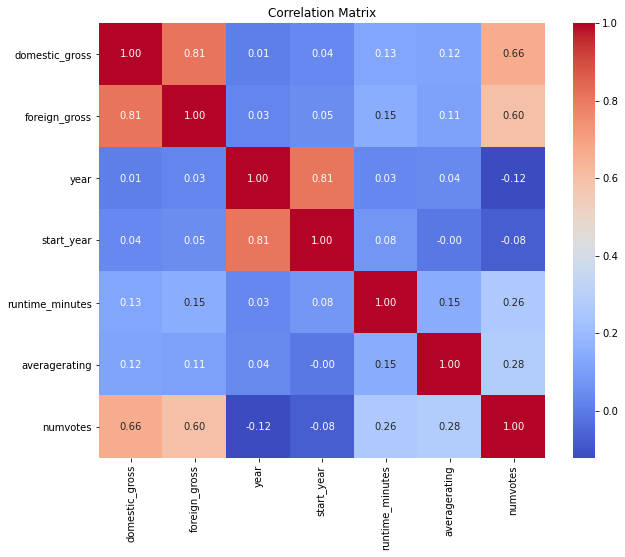

In [40]:
## Correlation matrix:

correlation_matrix = df_combined.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## VISUALIZATIONS

In [41]:
# Create the total_gross column for plotting analysis
df_combined['total_gross'] = df_combined['domestic_gross'] + df_combined['foreign_gross']


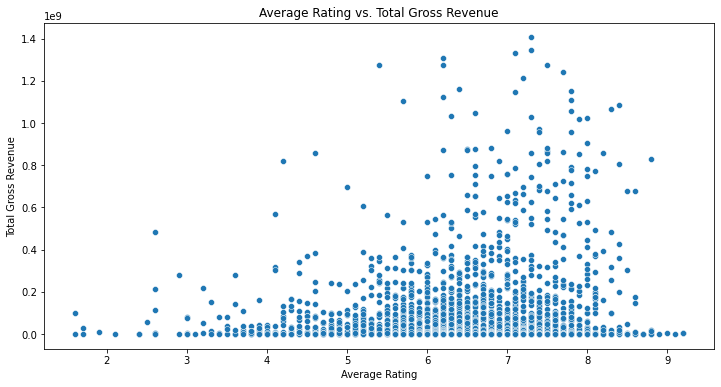

In [42]:
# Scatter plot for Average Rating vs. Total Gross Revenue
plt.figure(figsize=(12, 6))
sns.scatterplot(x='averagerating', y='total_gross', data=df_combined)
plt.title('Average Rating vs. Total Gross Revenue')
plt.xlabel('Average Rating')
plt.ylabel('Total Gross Revenue')
plt.show()

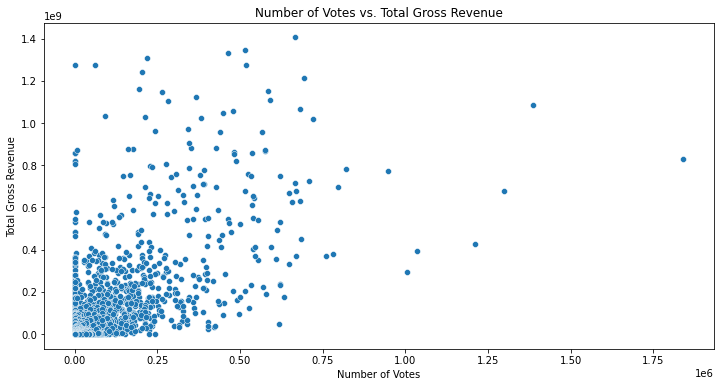

In [43]:
# Scatter plot for Number of Votes vs. Total Gross Revenue
plt.figure(figsize=(12, 6))
sns.scatterplot(x='numvotes', y='total_gross', data=df_combined)
plt.title('Number of Votes vs. Total Gross Revenue')
plt.xlabel('Number of Votes')
plt.ylabel('Total Gross Revenue')
plt.show()

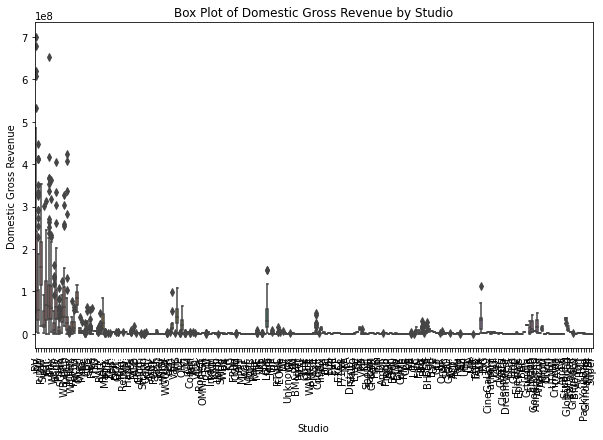

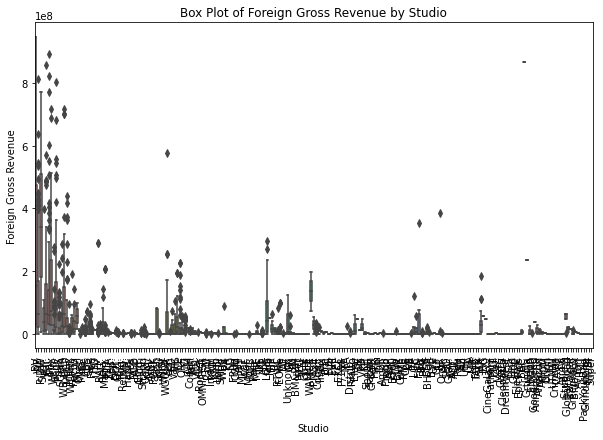

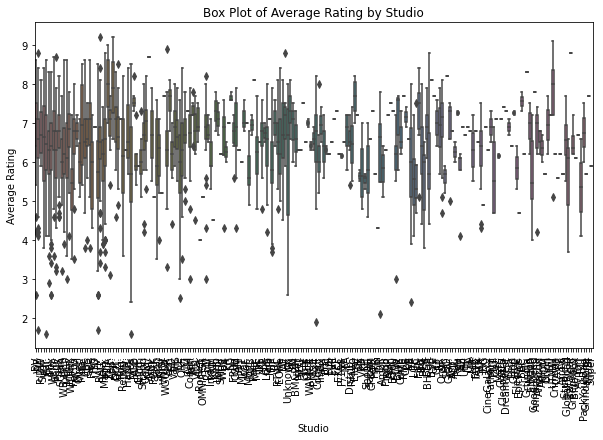

In [44]:
# Box plot for Domestic Gross Revenue
plt.figure(figsize=(10, 6))
sns.boxplot(x='studio', y='domestic_gross', data=df_combined)
plt.title('Box Plot of Domestic Gross Revenue by Studio')
plt.xlabel('Studio')
plt.ylabel('Domestic Gross Revenue')
plt.xticks(rotation=90)
plt.show()

# Box plot for Foreign Gross Revenue
plt.figure(figsize=(10, 6))
sns.boxplot(x='studio', y='foreign_gross', data=df_combined)
plt.title('Box Plot of Foreign Gross Revenue by Studio')
plt.xlabel('Studio')
plt.ylabel('Foreign Gross Revenue')
plt.xticks(rotation=90)
plt.show()

# Box plot for Average Rating by Studio
plt.figure(figsize=(10, 6))
sns.boxplot(x='studio', y='averagerating', data=df_combined)
plt.title('Box Plot of Average Rating by Studio')
plt.xlabel('Studio')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

##  RECCOMENDATIONS TO MICROSOFT BASED ON THESE ANALYSIS

 1. Invest in High-Rated Genres: 
 
 High rated movies genres are well-received and consequently more purchased than others

 This will directly impact on sales volumes and profit margins

 It will then be prudent to invest in high rated movies genres

2. Partaering with High performing studios.

 It would be interesting for microsoft to understand why some movies from particular studios are doing well, giving close attention to both domestic and foreign gross revenue.

 High performing studios will also certainly be resourceful on the movies industry and will always provide insightful ideas for improvement.

3. Consider audience sentiments

 The number of votes analysis points to audience engagements with the movies.

 Movies with more votes transalates to good business

 It's prudent to engage audience to get views on their movies through sociaL media

 The feedback gathered from their audiences will from time to time inform their decisions on the movies to invest on.